In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
df_train = pd.read_csv('../input/train_data/train_data.csv', sep=',')
df_test = pd.read_csv('../input/test_data/test_data.csv', sep=',')
nan_column = df_train.columns[df_train.isna().any()].tolist()
const_columns = [c for c in df_train.columns if len(df_train[c].drop_duplicates()) <= 2]

to_remove = nan_column + list(set(const_columns) - set(nan_column))

df = df_train.drop(columns=to_remove)
df.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_18,sensor_20,sensor_21,RUL
0,0,1,25.0074,0.6200,462.54,536.84,1256.52,1043.97,7.05,9.02,...,36.70,164.75,2028.38,7875.47,10.8850,306,1915,14.35,8.4712,339
1,0,2,35.0072,0.8413,449.44,555.44,1364.42,1128.75,5.48,8.00,...,41.78,183.67,2388.20,8073.12,9.2527,334,2223,14.88,8.9928,338
2,0,3,25.0053,0.6215,462.54,536.42,1265.94,1047.23,7.05,9.03,...,36.49,164.49,2028.40,7884.88,10.9054,307,1915,14.21,8.5107,337
3,0,4,42.0045,0.8407,445.00,549.41,1355.52,1115.81,3.91,5.72,...,41.78,130.67,2388.13,8093.08,9.3434,331,2212,10.63,6.4578,336
4,0,5,35.0046,0.8400,449.44,555.21,1361.04,1123.63,5.48,8.00,...,41.79,183.02,2388.19,8078.18,9.3287,334,2223,14.95,9.0279,335


In [5]:
df['GonnaFail']=(df['RUL']<=100).astype(int)
df.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_18,sensor_20,sensor_21,RUL,GonnaFail
0,0,1,25.0074,0.6200,462.54,536.84,1256.52,1043.97,7.05,9.02,...,164.75,2028.38,7875.47,10.8850,306,1915,14.35,8.4712,339,0
1,0,2,35.0072,0.8413,449.44,555.44,1364.42,1128.75,5.48,8.00,...,183.67,2388.20,8073.12,9.2527,334,2223,14.88,8.9928,338,0
2,0,3,25.0053,0.6215,462.54,536.42,1265.94,1047.23,7.05,9.03,...,164.49,2028.40,7884.88,10.9054,307,1915,14.21,8.5107,337,0
3,0,4,42.0045,0.8407,445.00,549.41,1355.52,1115.81,3.91,5.72,...,130.67,2388.13,8093.08,9.3434,331,2212,10.63,6.4578,336,0
4,0,5,35.0046,0.8400,449.44,555.21,1361.04,1123.63,5.48,8.00,...,183.02,2388.19,8078.18,9.3287,334,2223,14.95,9.0279,335,0


In [6]:
df_nc = (df - df.mean())/df.std()

In [23]:
col = df_nc.columns
col

Index(['engine_no', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17',
       'sensor_18', 'sensor_20', 'sensor_21', 'RUL', 'GonnaFail'],
      dtype='object')

In [17]:
len(df.engine_no.unique())

709

In [9]:
will = df[df['GonnaFail']==1]
will_not = df[df['GonnaFail']==0]

op_setting_1


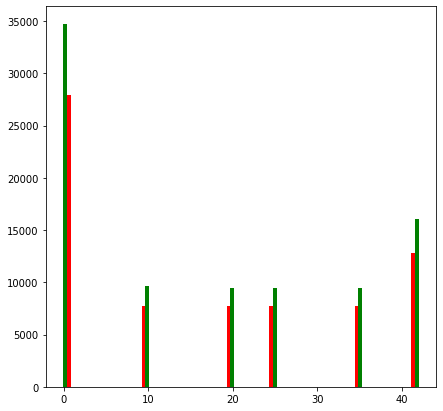

op_setting_2


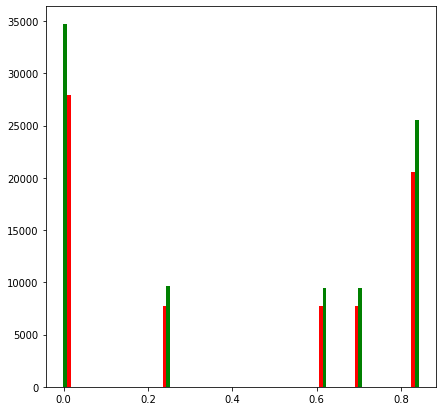

sensor_1


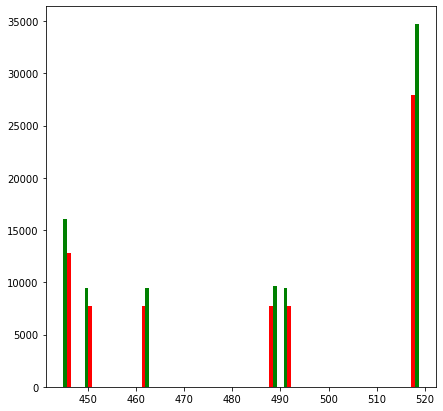

sensor_2


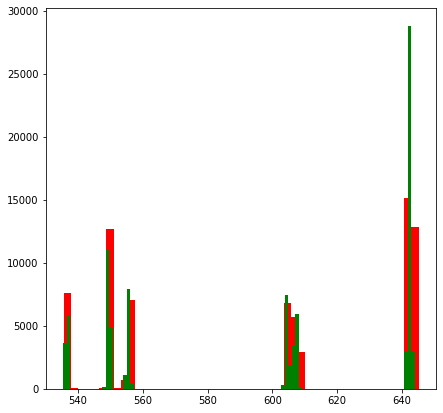

sensor_3


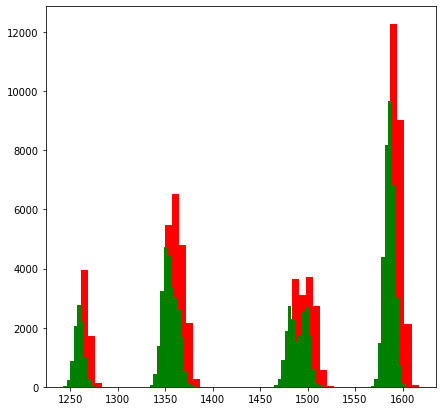

sensor_4


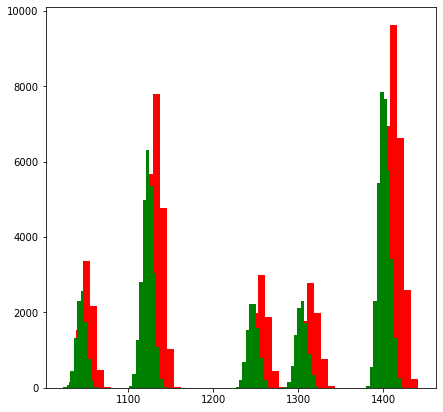

sensor_5


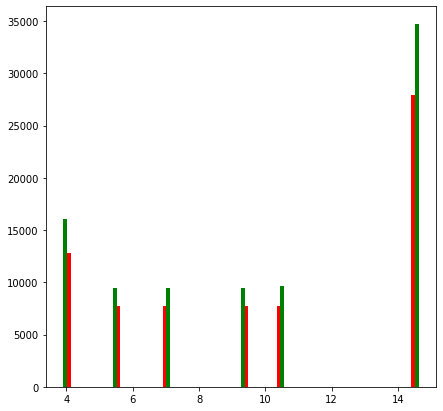

sensor_6


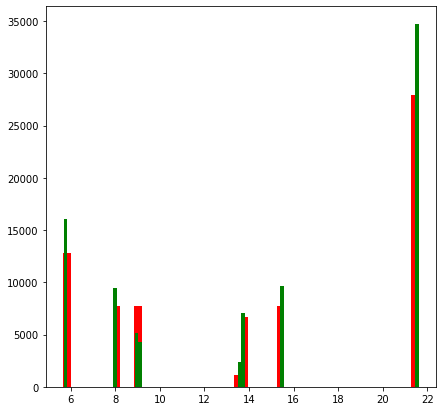

sensor_7


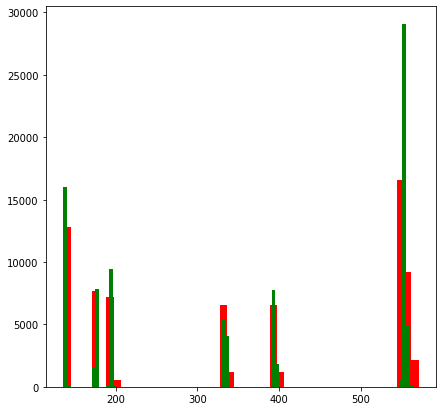

sensor_8


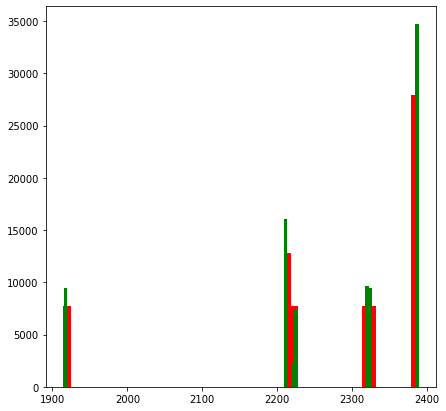

sensor_9


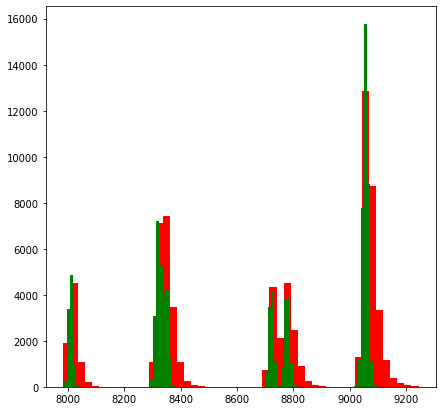

sensor_10


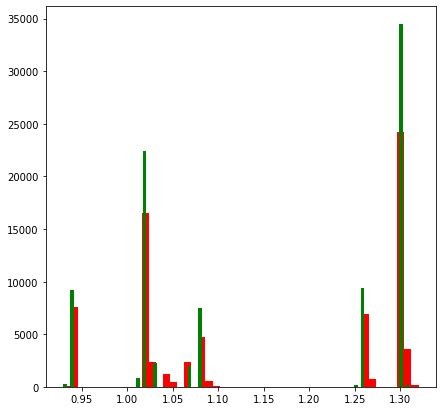

sensor_11


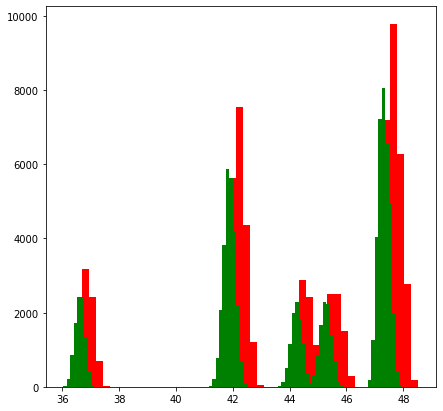

sensor_12


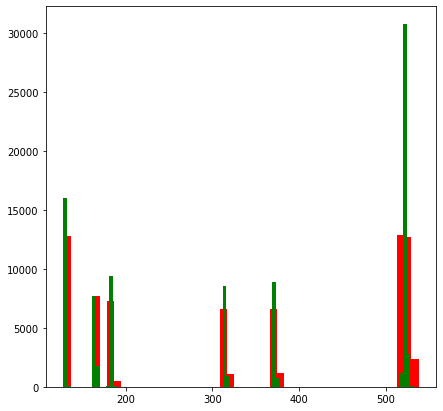

sensor_13


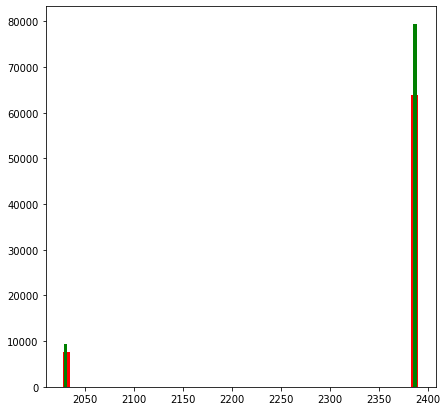

sensor_14


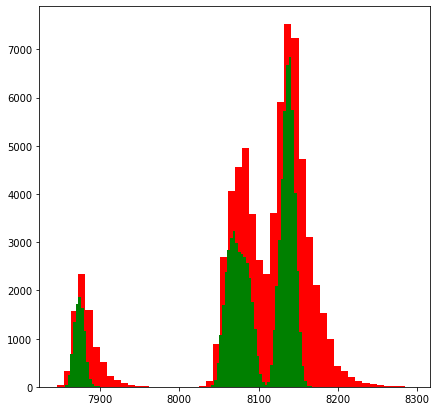

sensor_15


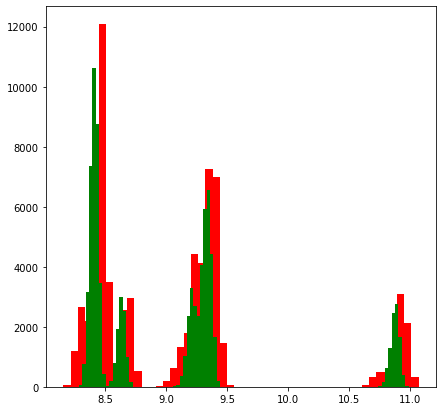

sensor_17


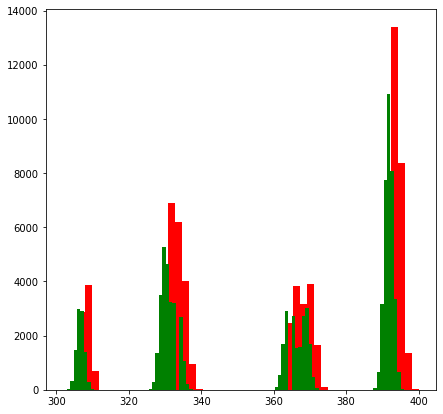

sensor_18


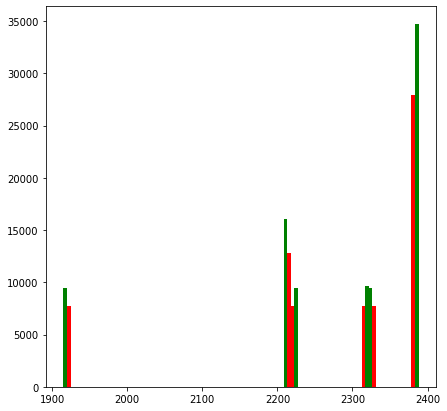

sensor_20


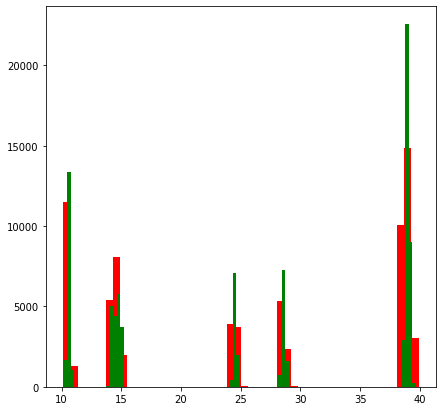

sensor_21


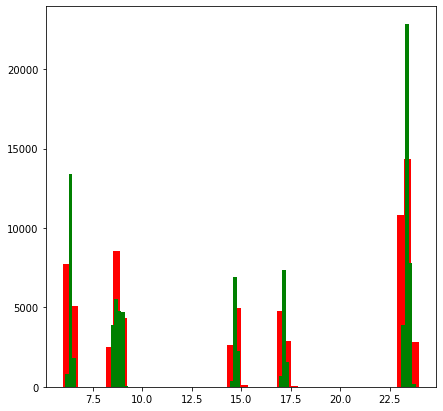

RUL


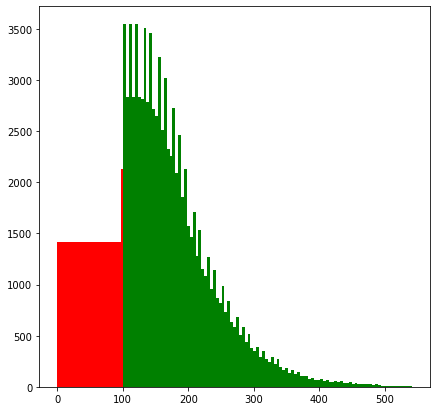

GonnaFail


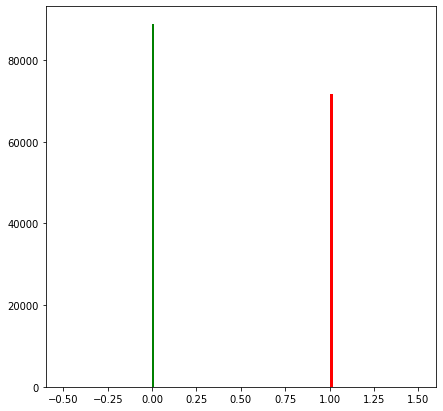

In [10]:
for c in col[2:]:
    print(c)
    plt.figure(figsize=(7, 7))
    plt.hist(will[c], color='r', bins=50)
    plt.hist(will_not[c], color='g', bins=100)
    plt.show()

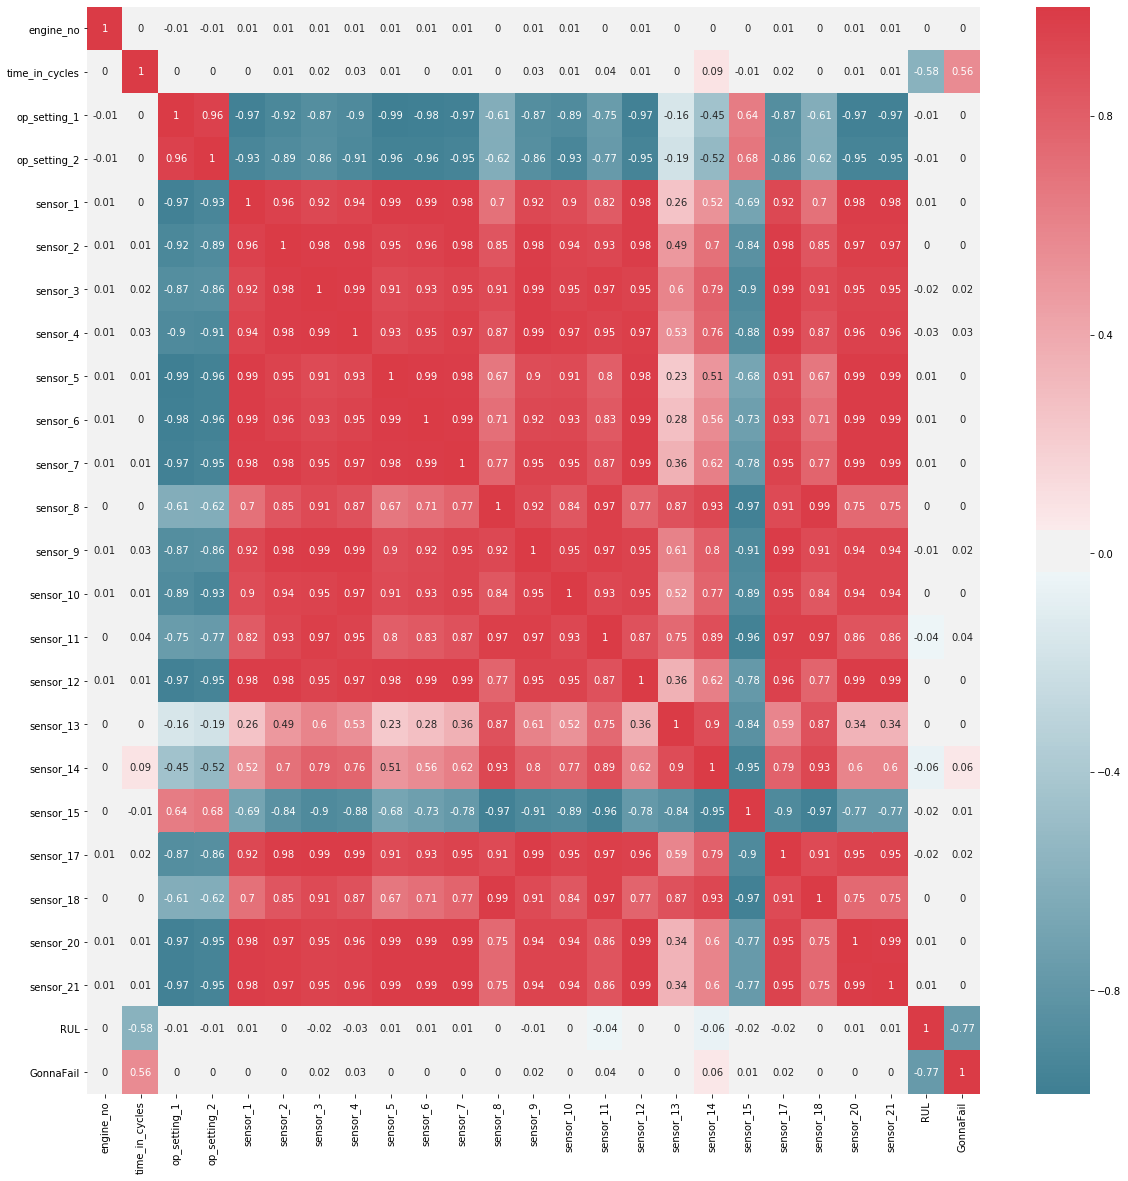

In [11]:
corr = df.corr()
corr = (corr*100).astype(int)/100
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True)

In [12]:
model = RandomForestClassifier()
X = df_nc.drop(columns=['RUL', 'GonnaFail'])
y = df['GonnaFail']

In [13]:
# Feature Engineering
s6 = df['sensor_6']
s7 = df['sensor_7']
s9 = df['sensor_9']
s11 = df['sensor_11']
s14 = df['sensor_14']

X['Feat1'] = np.cos(s6) + np.cos(s9) + np.sin(s14)
X['Feat2'] = s11 * np.sin(s7)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
from sklearn.metrics import f1_score
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = f1_score(y_test,  y_pred)
print(score)

0.8480382161894499


In [15]:
from sklearn.decomposition import PCA

[9.74002199e-01 1.95538275e-02 3.03863260e-03 1.08143216e-03
 1.05132013e-03 1.02230922e-03 1.79695751e-04 2.64337598e-05
 1.97929588e-05 1.39850044e-05 4.93480114e-06 1.79525471e-06
 1.17317919e-06 9.52766863e-07 9.05168261e-07 1.93804573e-07
 1.67062837e-07 8.88709686e-08 7.91630463e-08 4.25005555e-08
 3.33648412e-08 4.33720822e-09 1.06981041e-09 6.83482383e-10
 5.06274901e-11]


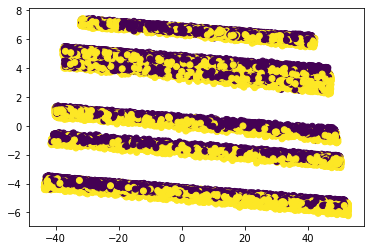

In [16]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()

In [20]:
df_t = df_test.drop(columns=to_remove)

In [22]:
df_t['pred_tree'] = model.predict(df_t)
df_t = df_t.sort_values(['engine_no', 'time_in_cycles'])

# On prend la dernière prédiction du RUL
df_result = df_t.groupby('engine_no').last().reset_index()[['engine_no', 'pred_tree']]

# On convertit en binaire (RUL > 100 ?)
df_result['result'] = df_result['pred_tree'].map(lambda x: 0 if x > 100 else 1)

ValueError: Length of values does not match length of index

In [24]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})